In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

<Client: 'tcp://127.0.0.1:34974' processes=4 threads=8, memory=33.67 GB>

In [3]:
session = cc.database.create_session()

In [4]:
Expt01 = '01deg_jra55v13_ryf9091'
Expt025 = '025deg_jra55v13_iaf_gmredi6'

In [5]:
surface_temp01 = cc.querying.getvar(Expt01,'surface_temp',session,ncfile='ocean_month.nc')

In [6]:
surface_temp01

<xarray.DataArray 'surface_temp' (time: 1116, yt_ocean: 2700, xt_ocean: 3600)>
dask.array<concatenate, shape=(1116, 2700, 3600), dtype=float32, chunksize=(1, 675, 900), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * time      (time) object 1900-01-16 12:00:00 ... 1992-12-16 12:00:00
Attributes:
    long_name:      Conservative temperature
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t

In [12]:
som01 = surface_temp01.sel(yt_ocean=slice(-50,-35)).sel(xt_ocean=slice(-50,0)).mean('yt_ocean').mean('xt_ocean').resample(time='Y').mean()

In [13]:
som01

<xarray.DataArray 'surface_temp' (time: 93)>
dask.array<stack, shape=(93,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-12-31 00:00:00 ... 1992-12-31 00:00:00

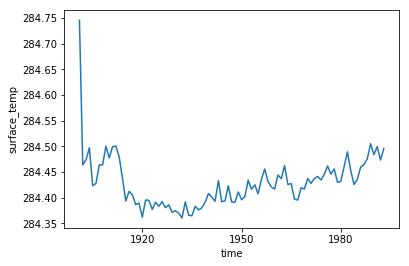

In [14]:
som01.plot()

In [ ]:
surface_temp01 = cc.querying.getvar(Expt01,'surface_temp',session,ncfile='ocean_month.nc')

In [7]:
mean_surface_temp =  surface_temp.mean('time')

In [8]:
plt.figure(figsize=(12,8))
surface_temp.plot(cmap=cm.cm.thermal)

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.scheduler - ERROR - Couldn't gather keys {"('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 158, 0, 1)": ['tcp://127.0.0.1:40731'], "('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 455, 1, 2)": ['tcp://127.0.0.1:46356'], "('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 192, 3, 1)": ['tcp://127.0.0.1:40731'], "('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 781, 1, 0)": ['tcp://127.0.0.1:46356'], "('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 803, 3, 1)": ['tcp://127.0.0.1:40731'], "('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 185, 1, 3)": ['tcp://127.0.0.1:46703'], "('concatenate-22cd85bea2e662cbe48

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 158, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 455, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 192, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 781, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 803, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 185, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 624, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 656, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 134, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 105, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 450, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 164, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 532, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 186, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1024, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 278, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 536, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 977, 3, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1002, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 879, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 497, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 873, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 441, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 229, 0, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 192, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 514, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 880, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 886, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 223, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 375, 0, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 683, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 780, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 421, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 681, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 13, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 485, 0, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 519, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 587, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 349, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 491, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 260, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 810, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 576, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 492, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 902, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 867, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 187, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 514, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 418, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 760, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 371, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 241, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 705, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 394, 2, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 101, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 466, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 389, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 967, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 651, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 538, 2, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 304, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 918, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1052, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 543, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 853, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 789, 0, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 778, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 330, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1000, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 932, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 301, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 319, 0, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 157, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 156, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 340, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 275, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 710, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 260, 2, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 786, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1047, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 931, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 654, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 309, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 235, 0, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 342, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 212, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 859, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 705, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 905, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 968, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1008, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 151, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 798, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 881, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 47, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 190, 2, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 437, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 388, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 493, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 966, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 525, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 465, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 253, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 474, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 30, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 247, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 305, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1052, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 130, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 872, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 755, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 979, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 995, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 280, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 565, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 96, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 951, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 377, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 563, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 883, 0, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 705, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 47, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 202, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 666, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 771, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 512, 3, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 595, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 969, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 338, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 859, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 84, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 942, 1, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 142, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 712, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 873, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 421, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1014, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 915, 2, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 990, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 994, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 435, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 10, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 956, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 579, 1, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1000, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 703, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 212, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1027, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 409, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 287, 2, 3)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 153, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 989, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 71, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 544, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 58, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 674, 3, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 566, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 255, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 286, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 774, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 264, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 453, 2, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 318, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 252, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 364, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 637, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 759, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1019, 0, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1043, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 905, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1018, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 302, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 637, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 778, 3, 0)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 208, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 956, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 468, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 226, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 964, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 49, 2, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 401, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 768, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 148, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 555, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 696, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 809, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 448, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 980, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 168, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 930, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 371, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 893, 2, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 851, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 430, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 248, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 890, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 560, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 529, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 941, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 357, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 762, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 949, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 157, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 43, 2, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 63, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 592, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 232, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 757, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 320, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 238, 0, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 429, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 349, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 861, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 214, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 832, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 144, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 228, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 378, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 636, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 2, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 675, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 399, 1, 0)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 724, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 646, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 359, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 203, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 256, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 432, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 914, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 237, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 601, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 21, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 81, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 815, 3, 0)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 617, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 621, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 317, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 242, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 428, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 958, 3, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 749, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 759, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 374, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 158, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 319, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1003, 2, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 471, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 737, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 299, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1037, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 334, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 556, 3, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 76, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 433, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 142, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 462, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 34, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 874, 2, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 101, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 204, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 780, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 459, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 717, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 287, 3, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 460, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 248, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1009, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 843, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 921, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 715, 1, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 506, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 80, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 44, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 712, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 965, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 615, 2, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 27, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 405, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 118, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 535, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 426, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1041, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 62, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 170, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 905, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 348, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 524, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 650, 3, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 883, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 629, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 751, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 147, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 215, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 251, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 75, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 131, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 204, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 539, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 509, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 865, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 304, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 563, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 567, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 379, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 567, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 418, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 333, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 586, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 280, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 90, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 934, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 464, 2, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 904, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 568, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 341, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 158, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 227, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 983, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 565, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 385, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 855, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 62, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 57, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 410, 2, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 643, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 642, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 861, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 685, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 486, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 805, 1, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 131, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 613, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 394, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 248, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 292, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 44, 0, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 853, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 549, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 995, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 538, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 327, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 455, 0, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 625, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 407, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 200, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 817, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 646, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 769, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 161, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 980, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 520, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 625, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 62, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 314, 0, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 663, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 340, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 675, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 713, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 629, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 676, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 679, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 684, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 495, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 981, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 630, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 671, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 625, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 297, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 306, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 961, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 653, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 665, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 816, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 385, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 426, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 415, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 522, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 560, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 892, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 867, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 787, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 966, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 789, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 363, 1, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 37, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 428, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 616, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 115, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 369, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 222, 2, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 544, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 859, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 419, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 180, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 568, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 261, 3, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 31, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1020, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 200, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1020, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 562, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 586, 1, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 459, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 285, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 73, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 963, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 281, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 766, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 103, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 535, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 172, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 366, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 574, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 550, 1, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 823, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 964, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 244, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 50, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 166, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 530, 2, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1021, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 448, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 974, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 656, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 465, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 657, 1, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 762, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 272, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 669, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 280, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 332, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 318, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 719, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 480, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 97, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 632, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 904, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 479, 2, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 800, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 164, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 324, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 95, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 552, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1046, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 43, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 319, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 145, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 628, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 369, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 339, 2, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1023, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 427, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 612, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 952, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 105, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 492, 0, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 823, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 116, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1002, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 141, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1038, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 546, 1, 0)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 946, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 748, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1048, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 512, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 99, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 356, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 468, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 502, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 919, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 425, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 116, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 167, 0, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 318, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 174, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 183, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 386, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 31, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 514, 0, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1001, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 540, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 156, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 846, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 560, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 382, 1, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 503, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 146, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 698, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 604, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 700, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 265, 3, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 299, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 263, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 988, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 241, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 156, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 292, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 384, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1035, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 470, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 83, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 200, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 273, 2, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 781, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 566, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 729, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 217, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 770, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 424, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 205, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 477, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 837, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1031, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 962, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 307, 3, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 509, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 387, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 510, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 391, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 427, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 137, 3, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 792, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1030, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 945, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 730, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 231, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 800, 3, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 994, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 27, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 417, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 593, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1028, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 995, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 123, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 427, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 598, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 715, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 285, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 331, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 346, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 503, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 251, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 858, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 493, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 669, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 571, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 834, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 888, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 125, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 623, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 199, 3, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 407, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 451, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 888, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 572, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 501, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 735, 0, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 956, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 918, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 671, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 788, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 707, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 466, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 571, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 920, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 58, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 979, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 319, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 856, 3, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 794, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 375, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 990, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 594, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 293, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 381, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 624, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 595, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 373, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 828, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 361, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 404, 3, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 480, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 113, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 64, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 196, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 917, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 945, 1, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 186, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 598, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 173, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 995, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 601, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 565, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 597, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 318, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 466, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 773, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1033, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 218, 3, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 653, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 970, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 321, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 615, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 230, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 315, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 251, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 974, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 453, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1002, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 452, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 990, 2, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 978, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 819, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1037, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 419, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 565, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 9, 1, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 232, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 378, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 637, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 762, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 306, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 546, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 945, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 82, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 769, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 896, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 903, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 636, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 475, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 753, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 865, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 758, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 361, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 387, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 28, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 35, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 841, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 164, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 21, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 614, 2, 3)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 101, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 793, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 742, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 472, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 725, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 67, 2, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 982, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 149, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 435, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 250, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 452, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 236, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 619, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 756, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 487, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 509, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 119, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 756, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 398, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 588, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 194, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 371, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 125, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 9, 1, 2)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 17, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 442, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 223, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 893, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 244, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 174, 3, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 863, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 783, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 152, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 501, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 43, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 224, 0, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 951, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 769, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 476, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 867, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1030, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 50, 0, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 212, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 0, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 898, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 212, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 368, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 978, 1, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1007, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 193, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1047, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 142, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 23, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 253, 1, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 841, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 216, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 561, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 321, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 364, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 985, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 185, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 938, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 908, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 130, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 414, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 46, 2, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 601, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 783, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 939, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 7, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 578, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 198, 2, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 283, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 365, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 425, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 313, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 805, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 7, 1, 0)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 345, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 530, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 53, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 638, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 220, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 487, 2, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 145, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 280, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 738, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 877, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 56, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 767, 3, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 403, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 931, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 202, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 600, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 614, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 659, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 664, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 573, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 870, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 195, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 687, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 185, 2, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 445, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 153, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 731, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 323, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 787, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1003, 2, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 806, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1013, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 892, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1039, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 776, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 406, 1, 3)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 664, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1023, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 855, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 603, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 629, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 469, 1, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 404, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 123, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 527, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 739, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 774, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 70, 3, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1016, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 313, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 883, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 463, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 727, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 651, 2, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 246, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 92, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 715, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 528, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 659, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 827, 3, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 582, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 712, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 986, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 147, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1032, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 885, 3, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 882, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 56, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 0, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 854, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 506, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 141, 3, 2)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 639, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 209, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1045, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 572, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 499, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 314, 3, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 658, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 87, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 960, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 102, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 660, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 715, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 872, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 674, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 612, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 293, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 77, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 599, 2, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 104, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 357, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 685, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 835, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 681, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1003, 1, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 246, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 335, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 47, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 608, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 167, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 158, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 331, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1033, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 163, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 835, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 949, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 664, 3, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 218, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1012, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 889, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 115, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 486, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1001, 1, 0)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 605, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 647, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 510, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 203, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 739, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 801, 0, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 429, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 945, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 868, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 584, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1020, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 636, 1, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 525, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 625, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 56, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1046, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 301, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 876, 3, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 257, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 627, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 319, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 522, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 556, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 852, 0, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 261, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 398, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 302, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 965, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1016, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 835, 1, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 400, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 208, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 524, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 781, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 553, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 779, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 17, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 130, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 385, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 916, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 496, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 720, 3, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 791, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 350, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 438, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 573, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 751, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 380, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 722, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 0, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 446, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1016, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 89, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 663, 1, 0)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 601, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 226, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 205, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 213, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 914, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 96, 0, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 745, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 266, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 792, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 799, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 360, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 696, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 928, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 894, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1022, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 969, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 841, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 273, 0, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1010, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 334, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 762, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 128, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 988, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 247, 0, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 340, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 736, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 11, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 72, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 98, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 235, 0, 3)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 44, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 483, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 497, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 64, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 690, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 928, 1, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 638, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 838, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 182, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 235, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 761, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 736, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 852, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 807, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 86, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 306, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 686, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 312, 3, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 608, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 521, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 385, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 49, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 920, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 769, 3, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 373, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 980, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 873, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 78, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 213, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 756, 0, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 714, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 908, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 255, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 659, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 755, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 535, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 452, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 408, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 306, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 270, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 25, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 626, 3, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 53, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 545, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 497, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 520, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 975, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 426, 0, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 485, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 162, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 650, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 104, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 172, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 177, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 510, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 650, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 257, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 757, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 948, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 741, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 238, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 521, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 676, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 810, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 835, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1050, 0, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 737, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 116, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 268, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 79, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 72, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 909, 3, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 77, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 42, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 253, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 479, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 554, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 243, 2, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 945, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 557, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 410, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 931, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 265, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 39, 3, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1025, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 728, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 2, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 461, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 585, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 100, 1, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 366, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 28, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1022, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 942, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 560, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 186, 3, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1018, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 342, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 157, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 626, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 608, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 936, 0, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 752, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 264, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1046, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 129, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 432, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1048, 2, 0)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 94, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1013, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 481, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 304, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 48, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 348, 3, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 61, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 735, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 708, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 502, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 594, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 984, 2, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 65, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 6, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 809, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 384, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 447, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 624, 3, 2)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 240, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 427, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 775, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 233, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 579, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 861, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 291, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 57, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 62, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 692, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 14, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 505, 0, 3)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 651, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 181, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 943, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 195, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 968, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 635, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 94, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 498, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 676, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 845, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 969, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 564, 2, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 130, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1047, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 765, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 256, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 834, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 723, 2, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1039, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 272, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 177, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1007, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 270, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 773, 0, 2)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 534, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 817, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 282, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 739, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 325, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 776, 2, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 979, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 542, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 772, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 955, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 758, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 614, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 681, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 899, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 45, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1018, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 571, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 661, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 224, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 64, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1043, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1045, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 585, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 506, 3, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 406, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 321, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 653, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 781, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 900, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 4, 3, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 921, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 85, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 336, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1036, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 230, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 380, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 89, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 255, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 426, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 149, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 831, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 796, 3, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 768, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 144, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 508, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 903, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 29, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 778, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 0, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 2, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 417, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 351, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1010, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 60, 1, 1)
NoneType: None
di

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 26, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 951, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1040, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 800, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 825, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 134, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 967, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 287, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 198, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 214, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 938, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 354, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 852, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 73, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 842, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1021, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 308, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 651, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1037, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 489, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 786, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 240, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 326, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 362, 2, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 717, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1034, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 831, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 997, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 947, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 833, 2, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1004, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 510, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 275, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 587, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 151, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 362, 3, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 356, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 388, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 921, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 584, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 824, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 854, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 601, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 796, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 428, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 50, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 33, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 714, 1, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 262, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 521, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 52, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 138, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 519, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 4, 1, 2)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 254, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 950, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 951, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 421, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 130, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 950, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1012, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 377, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 124, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 941, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 442, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 697, 0, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 900, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 420, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 609, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 905, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 734, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 177, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 519, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1018, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 138, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 775, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 109, 2, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 336, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 938, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 430, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 97, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1003, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 326, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 914, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 551, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 950, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1025, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 870, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 993, 0, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 59, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 171, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 500, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 563, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 202, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 860, 0, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 901, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 542, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 322, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 640, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 794, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 942, 1, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 90, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 353, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 524, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 459, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 602, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 525, 3, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 846, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 29, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 188, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 697, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 645, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 149, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 364, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 586, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 356, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 915, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 172, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 651, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 571, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 207, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 577, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 207, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 450, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1033, 2, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 161, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 505, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 977, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 680, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 877, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 194, 3, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 46, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 429, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 131, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 494, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 25, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 98, 3, 2)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 585, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 623, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 344, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 726, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 74, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 492, 1, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 35, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 176, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 338, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 959, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 215, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 284, 2, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 570, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 291, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 960, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 623, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 396, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 610, 3, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 594, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 710, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 134, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 979, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 269, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 486, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 101, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 513, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 662, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 321, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1044, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 130, 3, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1002, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 677, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 288, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 43, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 55, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 59, 0, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 625, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 915, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 181, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 218, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 810, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 710, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 387, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 481, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 426, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 153, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 240, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 830, 1, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1029, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 246, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 785, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 666, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 900, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 395, 0, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 204, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1012, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 856, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 265, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 384, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 212, 0, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 330, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1005, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 457, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 967, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 98, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 43, 1, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 188, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 343, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 251, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 168, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 761, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 364, 0, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1009, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 575, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 198, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 935, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1040, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1034, 1, 3)
NoneType: 

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 162, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 76, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 290, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 865, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 926, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 324, 0, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1042, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 372, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 257, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 724, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 557, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 871, 2, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 811, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 478, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 26, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 162, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 221, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 797, 3, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 123, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 65, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 761, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 578, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 218, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 463, 0, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 321, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 751, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 555, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 704, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 935, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 291, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 632, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 112, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 224, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 850, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 63, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 921, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 319, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 132, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 741, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 398, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 917, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 367, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 6, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 950, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 350, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 833, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 528, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 630, 0, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 385, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 732, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 960, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 888, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 362, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 704, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 502, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 977, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 897, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 686, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 110, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 139, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 879, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 533, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 175, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 835, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 891, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 634, 1, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 376, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 339, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 294, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 652, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1043, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 664, 2, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 196, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 243, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 185, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 368, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 178, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 771, 1, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 35, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 477, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 297, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1026, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 629, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 195, 0, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 130, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 596, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 797, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 367, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 653, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 431, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 238, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 663, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 501, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 246, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 617, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1033, 1, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 164, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 623, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 434, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 566, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 616, 1, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 895, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 153, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 674, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 495, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 224, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 711, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 551, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 698, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 234, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 978, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 189, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 551, 0, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 452, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1005, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1034, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 516, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 780, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 860, 3, 3)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 175, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 22, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 378, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 685, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 509, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 69, 2, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 710, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 189, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1009, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 869, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 433, 3, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 312, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 519, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 607, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 104, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 5, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 405, 3, 0)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 808, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 281, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1037, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 968, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 545, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 355, 0, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 437, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 88, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 757, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 42, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 538, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 371, 3, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 410, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 168, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 152, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 705, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 56, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1001, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 730, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 490, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 260, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 492, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 219, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 226, 2, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 606, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 899, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 157, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 535, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 137, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 177, 2, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 82, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 37, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 109, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 136, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 447, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 545, 2, 0)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1027, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 142, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 825, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 309, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 891, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 561, 2, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 681, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 695, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1025, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 624, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 530, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 741, 1, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 481, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 39, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 80, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 221, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 284, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 299, 0, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 821, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 14, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 208, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 196, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 505, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 916, 0, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 211, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 820, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 985, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 420, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1044, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 969, 2, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 744, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1038, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 0, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 491, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 454, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 878, 0, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 405, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 178, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 922, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 330, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 346, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 855, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 972, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 540, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 958, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 618, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 370, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 775, 3, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 467, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 810, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 909, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1043, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 476, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 11, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 639, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 63, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 26, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 789, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 708, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 12, 0, 2)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 252, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1048, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 667, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 320, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 988, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 690, 3, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 266, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 765, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 690, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 424, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 296, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 395, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 762, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 890, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 11, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 288, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 745, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1020, 0, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 279, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 107, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 431, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 341, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 714, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 922, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 383, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 534, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 73, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 335, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 825, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 979, 1, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 415, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 914, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 128, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 570, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 290, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 956, 1, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1040, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 938, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 967, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 949, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 326, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 444, 2, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 197, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 877, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 995, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 520, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 242, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 540, 1, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 596, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 347, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 733, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 599, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 201, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 848, 2, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 528, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 317, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 912, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 495, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 42, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 757, 0, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 182, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 359, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1039, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 375, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 483, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 972, 0, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 858, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 660, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 675, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 117, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 149, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 140, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 788, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 199, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1017, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 437, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 259, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 224, 2, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 91, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 303, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 36, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 708, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 411, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 680, 2, 2)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 373, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 557, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 435, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 104, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1030, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 978, 3, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 152, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 563, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1038, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 596, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 595, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 234, 3, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 119, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 82, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 7, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 889, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1021, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 33, 1, 0)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 220, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 361, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1043, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 637, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 183, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 358, 1, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 260, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 518, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 259, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 732, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1009, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 392, 2, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 565, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 965, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 824, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 253, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 604, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 899, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 58, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 510, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 768, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 109, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 680, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 280, 0, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 765, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 174, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 56, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 729, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 76, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 57, 3, 0)
NoneType: None
d

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 384, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 507, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 709, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 357, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 349, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 598, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 890, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 619, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 83, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 428, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 347, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 58, 2, 2)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 484, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 374, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 157, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 896, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 593, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1048, 3, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 47, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 498, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 413, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 195, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 430, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 831, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 850, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 507, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 547, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 867, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1035, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 33, 3, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 448, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 488, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 733, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 520, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 865, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 716, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 704, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 865, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1048, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 881, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 866, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 566, 0, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 547, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 97, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 311, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 344, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 751, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 901, 2, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 944, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 991, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 409, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 643, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 223, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 950, 3, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 352, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 457, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 452, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 382, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 872, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 657, 2, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 349, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 210, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 762, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 550, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 972, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 0, 1, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 992, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 407, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 476, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 543, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 633, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 602, 0, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 345, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 451, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 892, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 869, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 296, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 842, 2, 3)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 887, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 539, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 994, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 116, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 530, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 30, 2, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 188, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 242, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 457, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 473, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 208, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 865, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 455, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 232, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 124, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 751, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 577, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 763, 0, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 26, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 752, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 694, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 818, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 809, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 698, 1, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 121, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 748, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 156, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 502, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 203, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 340, 2, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 746, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 209, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 16, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 54, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 883, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 743, 3, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 147, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 22, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 517, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 439, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 206, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 689, 1, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 612, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 947, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 33, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 245, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 554, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 741, 1, 1)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1016, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 744, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 730, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 262, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 675, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 21, 3, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 818, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 922, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 785, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 703, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1045, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 117, 1, 2)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 999, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 826, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1046, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 769, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 277, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 736, 3, 3)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 51, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1001, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 59, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 35, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 622, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 262, 1, 1)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 731, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 644, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1025, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 623, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 170, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 83, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 637, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 824, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 738, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 896, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 338, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 70, 2, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 802, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 96, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 527, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 754, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1044, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 182, 0, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1007, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 628, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 857, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 34, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 890, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 73, 1, 3)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 665, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 119, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 284, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 253, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 93, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 682, 1, 2)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1035, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 64, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1027, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 824, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 392, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 450, 1, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 799, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 339, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 366, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 353, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 277, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 932, 2, 1)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1031, 0, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 715, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 236, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 323, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1031, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 338, 2, 1)
NoneType: N

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 614, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 471, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 495, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 781, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 731, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 523, 1, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 45, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 774, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 568, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 32, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 146, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 433, 2, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 831, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 472, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 631, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 559, 2, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 402, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 598, 2, 2)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 490, 2, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 765, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 373, 1, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1008, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 510, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 582, 0, 0)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 466, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 225, 1, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 550, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 221, 3, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 241, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 439, 1, 0)
NoneType: Non

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 434, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 911, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 642, 3, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 81, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 565, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 54, 2, 3)
NoneType: None


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 772, 2, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1010, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 443, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 549, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 680, 0, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 393, 2, 1)
NoneType: No

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46356'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 927, 1, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 607, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:45724'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 621, 3, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 771, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 398, 0, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 10, 3, 0)
NoneType: None

distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1011, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46703'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 426, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 1023, 2, 1)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 847, 3, 2)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 971, 1, 3)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:40731'], ('concatenate-22cd85bea2e662cbe48a6eaa8cf817e9', 219, 3, 0)
NoneType: N

KeyboardInterrupt: 

<Figure size 864x576 with 0 Axes>